In [ ]:
import cv2
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import dot
from numpy import linalg as la
from numpy.linalg import norm
import matplotlib
from matplotlib import pyplot as plt
from collections import Counter
import time

In [ ]:
#Crearea matricei de antrenare
A = np.zeros([10304,320])
index = 0
pathSursa="/content/drive/MyDrive/Proiecte"

for i in range(1,41):
  pathPersoane = pathSursa +"/s" + str(i) + "/"
  for j in range(1,9):
    pathPozaAntrenare = pathPersoane + str(j) + '.pgm'
    # citim poza ca matrice 112 x 92:
    pozaAntrenare = np.array(cv2.imread(pathPozaAntrenare,0))
    # vectorizam poza:
    pozaVect = pozaAntrenare.reshape(10304,)
    A[:,index] = pozaVect
    index=index+1

# **Algoritmul NN**

In [ ]:
#Algoritmul NN

def AlgoritmulNN(A, pozaCautata, norma):
  distante = np.zeros(len(A[0]))

  if(norma == "L1"):
    for i in range(0,len(distante)):
      distante[i] = np.linalg.norm((A[:,i]-pozaCautata), ord=1)

  elif(norma == "L2"):
    for i in range(0,len(distante)):
      distante[i] = la.norm(A[:,i]-pozaCautata)

  elif(norma == "LINF"):
    for i in range(0,len(distante)):
      distante[i] = np.linalg.norm((A[:,i]-pozaCautata), ord=np.inf)

  elif(norma == "LCOS"):
    for i in range(0,len(distante)):
      distante[i] = 1 - np.inner(A[:,i], pozaCautata)/(norm(A[:,i])*norm(pozaCautata))

  else:
    print("Nume norma incorect. Incercati L1, L2, LINF sau LCOS")
    return -1
    

  pozitia = np.argmin(distante) # returneaza indicele la care se afla cea mai mica distanta
  
  return pozitia # pozitia la care se afla imaginea gasita

Timp de rulare 0.09981083869934082 secunde
Rezultat NN: Persoana 4 , Poza 2



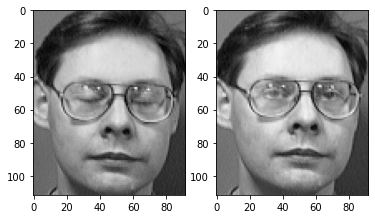

In [ ]:
pozaCautata = (np.array(cv2.imread('/content/drive/MyDrive/Proiecte/s4/9.pgm',0))).reshape(10304,)

timp_start = time.time()
rezultat_NN = AlgoritmulNN(A, pozaCautata, "L2")
print("Timp de rulare %s secunde" % (time.time() - timp_start))

if(rezultat_NN > 0):
  print("Rezultat NN: Persoana", rezultat_NN//8+1, ", Poza", rezultat_NN%8+1)
  print()

  f = plt.figure()
  f.add_subplot(1,2, 1)
  plt.imshow(pozaCautata.reshape(112,92), cmap='gray')
  f.add_subplot(1,2, 2)
  plt.imshow(A[:,rezultat_NN].reshape(112,92), cmap='gray')
  plt.show(block=True)

# **Algoritmul kNN**

In [ ]:
#Algoritmul kNN

def AlgoritmulkNN(A, pozaCautata, norma, k):
  distante = np.zeros(len(A[0]))

  if(norma == "L1"):
    for i in range(0,len(distante)):
      distante[i] = np.linalg.norm((A[:,i]-pozaCautata), ord=1)

  elif(norma == "L2"):
    for i in range(0,len(distante)):
      distante[i] = la.norm(A[:,i]-pozaCautata)

  elif(norma == "LINF"):
    for i in range(0,len(distante)):
      distante[i] = np.linalg.norm((A[:,i]-pozaCautata), ord=np.inf)

  elif(norma == "LCOS"):
    for i in range(0,len(distante)):
      distante[i] = 1 - np.inner(A[:,i], pozaCautata)/(norm(A[:,i])*norm(pozaCautata))

  else:
    print("Nume norma incorect. Incercati L1, L2, LINF sau LCOS")
    return -1


  vector_pozitii = np.argsort(distante) # returneaza indicii la care se afla distantele cele mai mici (care au fost ordonate crescator)
  vector_pozitii = vector_pozitii[:k]

  print("Pozitiile imaginilor cu distantele cele mai mici:")
  print(vector_pozitii)
  print("Persoana din pozele respective:")
  print(vector_pozitii//8+1)
  print()

  aparitii_clase = Counter(vector_pozitii//8)
  predictie_knn = aparitii_clase.most_common(1)[0][0]*8
  
  return predictie_knn # pozitia la care se afla prima imagine a persoanei gasite


Pozitiile imaginilor cu distantele cele mai mici:
[  7   4   3   6 187]
Persoana din pozele respective:
[ 1  1  1  1 24]

Timp de rulare 0.1324143409729004 secunde

Rezultat kNN: Persoana 1



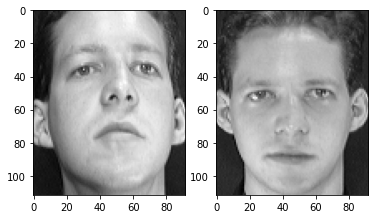

In [ ]:
pozaCautata = (np.array(cv2.imread('/content/drive/MyDrive/Proiecte/s1/9.pgm',0))).reshape(10304,)

timp_start = time.time()
rezultat_kNN = AlgoritmulkNN(A, pozaCautata, "LCOS", 5)
print("Timp de rulare %s secunde" % (time.time() - timp_start))


if(rezultat_kNN >= 0):
  print("\nRezultat kNN: Persoana", rezultat_kNN//8+1)
  print()

  f = plt.figure()
  f.add_subplot(1,2, 1)
  plt.imshow(pozaCautata.reshape(112,92), cmap='gray')
  f.add_subplot(1,2, 2)
  plt.imshow(A[:,rezultat_kNN].reshape(112,92), cmap='gray')
  plt.show(block=True)